<a href="https://colab.research.google.com/github/MaralAminpour/ML-BME-Course-UofA-Fall-2023/blob/main/Week-5-Clustering%20and%20Features/5.4-Feature-extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaralAminpour/ML-BME-Course-UofA-Fall-2023/blob/main/Week-5-Clustering%20and%20Features/5.4-Feature-extraction.ipynb)

# Part IV: Feature extraction
## Detecting cancer from histopatological images
In this tutorial we will apply feature extractors to detect cancer in histopatological images of breast tissue. We will use selected images from the PatchCamelyon dataset https://github.com/basveeling/pcam.
<img src="https://github.com/MaralAminpour/ML-BME-Course-UofA-Fall-2023/blob/main/Week-5-Clustering%20and%20Features/images/pcam.jpg?raw=1" style="max-width:100%; width: 100%; max-width: none">

### Load the dataset

Run the code below to download the data files and load the dataset from the file `histological_data.npz`.

In [1]:
# This code will download the required data files from GitHub
import requests
def download_data(source, dest):
    base_url = 'https://raw.githubusercontent.com/'
    owner = 'MaralAminpour'
    repo = 'ML-BME-Course-UofA-Fall-2023'
    branch = 'main'
    url = '{}/{}/{}/{}/{}'.format(base_url, owner, repo, branch, source)
    r = requests.get(url)
    f = open(dest, 'wb')
    f.write(r.content)
    f.close()

# Create the temp directory, if it doesn't already exist
import os
if not os.path.exists('temp'):
   os.makedirs('temp')

download_data('Week-5-Clustering and Features/histological_data.zip', 'temp/histological_data.zip')

# Unzip the file
!pip install patool
import patoolib
patoolib.extract_archive('temp/histological_data.zip', outdir='temp/')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.0 MB/s eta 0:00:00
patool: Extracting temp/histological_data.zip ...
patool: running /usr/bin/7z x -otemp/ -- temp/histological_data.zip
patool: ... temp/histological_data.zip extracted to `temp/'.


'temp/'

In [2]:
import numpy as np

# Load dataset from .npz file
data = np.load('temp/histological_data.npz')

# Train images and labels
X_train = data['X_train']
y_train = data['y_train'].astype('int')

# Test images and labels
X_test  = data['X_test']
y_test  = data['y_test'].astype('int')

# Print shapes here
print('Training data - images:', X_train.shape)
print('Training data - labels:',y_train.shape)
print('Test data - images:',X_test.shape)
print('Test data - labels:',y_test.shape)
print('Labels: ', np.unique(y_test))

Training data - images: (1500, 96, 96)
Training data - labels: (1500,)
Test data - images: (150, 96, 96)
Test data - labels: (150,)
Labels:  [0 1]


**Activity 1:** Answer the following questions:
* How many training samples do we have?
* How many test samples do we have?
* What is the dimension of each sample image?
* How many labels do we have?

**Answer:**

Let's now plot a few example histopathological images. Note that label 1 means presence of cancerous cells.

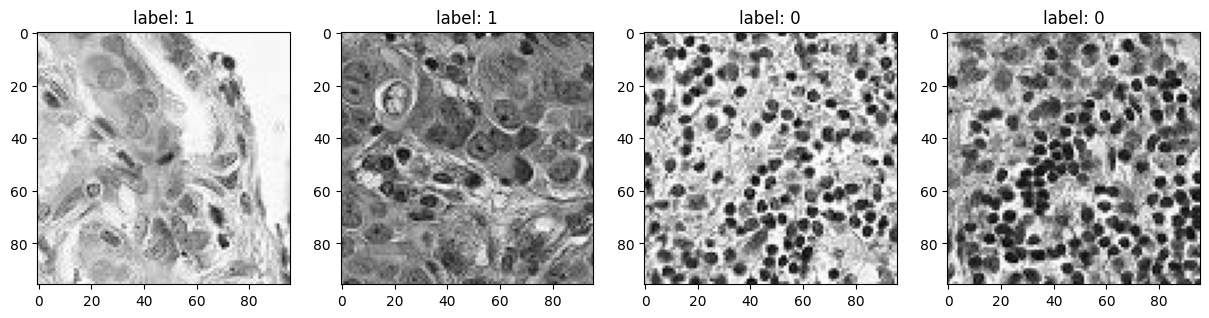

In [3]:
import matplotlib.pyplot as plt

id_images = [4, 5, 6, 7]

plt.figure(figsize=(15, 8))
for i in np.arange(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[id_images[i], :, :], cmap='gray')
    plt.title('label: ' + str(y_train[id_images[i]]))

# Cancer detection using texture descriptors

We will now calculate the texture descriptors using **Grey-level co-occurrence matrix (GLCM)**. The matrix can be calculated using `skimage` object `graycomatrix`.

We will select one healthy and one cancerous sample image. The GLCM for the healthy sample has been generated and plotted for you.

**Activity 2:** Do the same for the cancerous sample. Do the matrices look different? Can you think why?

**Answer:**

In [ ]:
# Example images
healthy = X_train[7, :, :]
cancer = X_train[5, :, :]

# Calculate and plot GLCM
from skimage.feature import graycomatrix

plt.figure(figsize=(10,4))

plt.subplot(121)
glcm_healthy = graycomatrix(np.round(healthy*63).astype('uint8'), [3], [0],64)
plt.imshow(glcm_healthy.reshape(64,64), cmap='gray')
plt.title('GLCM healthy')

plt.subplot(122)
glcm_cancer = None
plt.imshow(glcm_cancer.reshape(64,64), cmap='gray')
_=plt.title('GLCM cancer')

This code snippet is aimed at computing and visualizing the Gray Level Co-occurrence Matrix (GLCM) for two example images – one representing a healthy sample and the other representing a cancer sample.

1. **Defining Example Images**:
```python
healthy = X_train[7, :, :]
cancer = X_train[5, :, :]
```
Here, `X_train` is presumably a dataset of images, and the code extracts the 8th and 6th images (indexed at 7 and 5, respectively) to represent a healthy sample and a cancer sample.

2. **Importing Necessary Library**:
```python
from skimage.feature import greycomatrix
```
This line imports the `greycomatrix` function from the `skimage.feature` module, which is used to compute the GLCM.

3. **Setting up the Visualization**:
```python
plt.figure(figsize=(10,4))
```
This line initializes a new figure with the specified dimensions for visualization.

4. **Computing and Visualizing GLCM for Healthy Sample**:
```python
plt.subplot(121)
glcm_healthy = greycomatrix(np.round(healthy*63).astype('uint8'), [3], [0],64)
plt.imshow(glcm_healthy.reshape(64,64), cmap='gray')
plt.title('GLCM healthy')
```
- `plt.subplot(121)` specifies that the upcoming plots will be in a 1x2 grid, and we're now focusing on the first subplot.
- The `greycomatrix` function is used to compute the GLCM. The image intensities are first scaled and rounded to a range between 0 and 63 (using `np.round(healthy*63)`) and then converted to unsigned 8-bit integer format (`'uint8'`). The parameters `[3]` and `[0]` define the distance and angle for computing the co-occurrence matrix, respectively. The last parameter, `64`, specifies the number of gray levels.
- `plt.imshow(...)` displays the computed GLCM for the healthy image.
- `plt.title('GLCM healthy')` adds a title to the visualization.

5. **Computing and Visualizing GLCM for Cancer Sample**:
```python
plt.subplot(122)
glcm_cancer = greycomatrix(np.round(cancer*63).astype('int'), [3], [0], 64)
plt.imshow(glcm_cancer.reshape(64,64), cmap='gray')
_=plt.title('GLCM cancer')
```
This portion is analogous to the previous step but focuses on the cancer sample image. The GLCM is computed and visualized in a similar manner.

In summary, the provided code snippet visualizes the Gray Level Co-occurrence Matrix for two images, highlighting the differences in texture between a healthy and a cancer sample.

Now we can calculate some statistical properties from the GLCM matrix. We can do that using `skimage` object `graycoprops`. Print out different statistical measures for the healthy and cancerous tissue:
* `'contrast'`
* `'dissimilarity'`
* `'homogeneity'`
* `'energy'`
* `'correlation'`

**Activity 3:** Complete the code below to generate all five measures for both healthy and cancerous samples.

In [ ]:
from skimage.feature import graycoprops
properties = ['contrast', None, None, None, None]

for p in properties:
    print(p+': ')
    print('  healthy: ', np.round(graycoprops(glcm_healthy, p)[0,0],2))
    print('  cancer: ', np.round(graycoprops(glcm_cancer, p)[0,0],2))


contrast: 
  healthy:  439.54
  cancer:  145.64
dissimilarity: 
  healthy:  16.37
  cancer:  9.14
homogeneity: 
  healthy:  0.07
  cancer:  0.12
energy: 
  healthy:  0.02
  cancer:  0.03
correlation: 
  healthy:  0.12
  cancer:  0.24


## Exercise 4

In this exercise you will train a logistic regression classifier to detect cancer using GLCM features. Complete code below as follows:
* Extract two GLCM features of your choice. To do that, complete the function `getGLCMfeatures`. Feature extraction code is given.
* Fit the logistic regression model to the training data and calculate training performance using function `PerformanceMeasures`.
* Evaluate performance on the test data using function `PerformanceMeasures`.
* Amend features extracted in function `getGLCMfeatures` to achieve good performance of the model.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

def getGLCMfeatures(im):
    im = np.round(im*63).astype('uint8')
    glcm = graycomatrix(im, [3], [0], 64)
    feature1 = graycoprops(glcm, None)[0, 0]
    feature2 = graycoprops(glcm, None)[0, 0]
    return feature1, feature2

def PerformanceMeasures(model,X,y):
    accuracy = model.score(X,y)
    y_pred = None
    sensitivity = None
    specificity = None

    print('Accuracy: ', round(accuracy,2))
    print('Sensitivity: ', round(sensitivity,2))
    print('Specificity: ', round(specificity,2))

# Feature extraction
X_train_features = []
for im in X_train:
    X_train_features.append(getGLCMfeatures(im))
X_train_features = np.asarray(X_train_features)
scaler= StandardScaler()
X_train_features=scaler.fit_transform(X_train_features)

# Fit model
model = None
model.fit(X_train_features,y_train)
print('Training:')
PerformanceMeasures(model, X_train_features,y_train)

# Test
X_test_features  = []
for im in X_test:
    X_test_features.append(getGLCMfeatures(im))
X_test_features  = np.asarray(X_test_features)
X_test_features=scaler.fit_transform(X_test_features)
print('Test:')
PerformanceMeasures(model, X_test_features,y_test)

Training:
Accuracy:  0.76
Sensitivity:  0.73
Specificity:  0.78
Test:
Accuracy:  0.79
Sensitivity:  0.8
Specificity:  0.78


# Cancer detection using localised feature descriptors

Now we will try to train a classifier using the DAISY descriptor instead. First, let's extract the DAISY features from the histological images.


A number of feature extractors are available at `skimage`, including `daisy`.

**Activity 4:** Run the code below to perform feature extraction using `skimage` object `daisy` and visualise your extracted features.
* Change the parameters `step` and `radius` to see how the daisy extractor changes.
* Set `step` to 60 and `radius` to 30. Then try to change the other parameters of the DAISY descriptor.

Feature vector shape daisy:  (2, 2, 136)


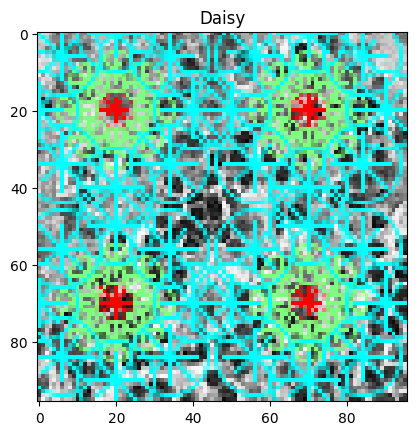

In [ ]:
from skimage.feature import daisy

# Example of feature extraction using daisy
features_daisy, visualisation_daisy = daisy(healthy, step=50, radius=20, rings=2, histograms=8, orientations=8, visualize=True)
plt.imshow(visualisation_daisy)
plt.title('Daisy')

# Extracted features
print('Feature vector shape daisy: ', features_daisy.shape)

## Exercise 5

Train a classifier to detect cancer in histological images using features extracted by DAISY descriptor.
* Complete the function `daisy_feature_extractor`
* Run the code below to extract the daisy features for training and test sets. This may take a while to run.

In [ ]:
# Feature extractor
def daisy_feature_extractor(image):
    features_daisy = None  # Set visualize=False
    return features_daisy.flatten()

# Perform feature extraction for both training and test set
X_train_features = []
X_test_features  = []

# Go through all the images, perform feature extraction and then append them to the list
for img in X_train:
    X_train_features.append(daisy_feature_extractor(img))
for img in X_test:
    X_test_features.append(daisy_feature_extractor(img))

# Make the lists back into numpy arrays
X_train_features = np.asarray(X_train_features)
X_test_features  = np.asarray(X_test_features)

# Print dimensions
print('Feature matrix train: ', X_train_features.shape)
print('Feature matrix test: ', X_test_features.shape)

Feature matrix train:  (1500, 544)
Feature matrix test:  (150, 544)


* Train a random forest classifier to detect cancer
* Evaluate training and test performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = None  # Set min_samples_leaf = 50
model.fit(X_train_features,y_train)
print('Training:')
PerformanceMeasures(model, X_train_features,y_train)
print('Test:')
PerformanceMeasures(model, X_test_features,y_test)

Training:
Accuracy:  0.8
Sensitivity:  0.65
Specificity:  0.9
Test:
Accuracy:  0.76
Sensitivity:  0.51
Specificity:  0.88


* Compare the performance to GLSM features

**Answer:**